In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [2]:
from google.colab import files
uploaded = files.upload()

Saving airbnb_copenhagen_year to airbnb_copenhagen_year (1)


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['airbnb_copenhagen_year']))

In [0]:
df = df.drop(['id'], axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.host_identity_verified = labelencoder.fit_transform(df.host_identity_verified)

In [6]:
X = df.drop(['price'], axis=1)
y = df.price
print(X.shape)
print(y.shape)

(245288, 32)
(245288,)


In [0]:
X = X.drop(['flexible','moderate','no_response','within_an_hour','within_a_day','within_a_few_hours',
           'Jul','a_few_days','Apr','Jan','Nov','Feb','Mar','Aug','Dec','super_strict_30',
           'Sep','Oct'], axis=1)

In [10]:
print(X.shape)

(245288, 14)


In [8]:
from sklearn.model_selection import train_test_split
# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
print("Testing dataset length: ",len(X_test))
print("Training dataset length: ",len(X_train))

Testing dataset length:  49058
Training dataset length:  196230


In [9]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    # Compile model
    #optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

Using TensorFlow backend.


In [12]:
model = create_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=256)

Instructions for updating:
Use tf.cast instead.
Train on 196230 samples, validate on 49058 samples
Epoch 1/200
196230/196230 [==============================] - 1s 6us/step - loss: 515513.8058 - mean_absolute_error: 644.8881 - val_loss: 290162.1783 - val_mean_absolute_error: 462.5958
Epoch 2/200
196230/196230 [==============================] - 1s 5us/step - loss: 153232.1135 - mean_absolute_error: 304.1793 - val_loss: 95580.8923 - val_mean_absolute_error: 231.6702
Epoch 3/200
196230/196230 [==============================] - 1s 5us/step - loss: 82718.7543 - mean_absolute_error: 216.3674 - val_loss: 78571.8698 - val_mean_absolute_error: 209.7691
Epoch 4/200
196230/196230 [==============================] - 1s 5us/step - loss: 72719.9040 - mean_absolute_error: 202.9074 - val_loss: 71252.4938 - val_mean_absolute_error: 199.9281
Epoch 5/200
196230/196230 [==============================] - 1s 5us/step - loss: 67292.8163 - mean_absolute_error: 195.3490 - val_loss: 66762.2746 - val_mean_absolute

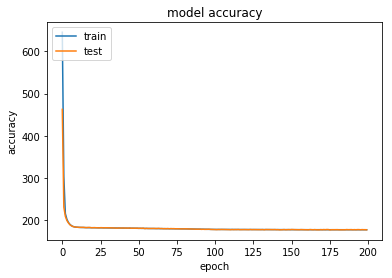

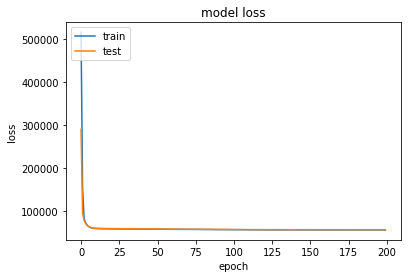

In [14]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,val_loss,val_mean_absolute_error,loss,mean_absolute_error,epoch
190,56481.590428,178.008066,56110.487265,178.092448,190
191,56460.809611,178.247915,56106.419293,178.043402,191
192,56467.921700,178.013510,56110.004286,178.101006,192
193,56461.673117,178.339525,56110.533061,178.042591,193
194,56454.253500,178.347990,56099.350873,178.040857,194
195,56479.460416,177.996401,56103.391096,178.067043,195
196,56462.341071,178.357815,56102.061792,178.060320,196
197,56462.152120,178.117522,56097.889994,178.053493,197
198,56466.625938,178.153971,56095.813549,178.047261,198
199,56500.983916,177.875852,56099.658402,178.084601,199


In [0]:
def create_model1():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(1))
    # Compile model
    #optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [21]:
model1 = create_model1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 15        
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=256)

Train on 196230 samples, validate on 49058 samples
Epoch 1/200
196230/196230 [==============================] - 1s 7us/step - loss: 384465.6367 - mean_absolute_error: 521.8180 - val_loss: 104162.0886 - val_mean_absolute_error: 241.8427
Epoch 2/200
196230/196230 [==============================] - 1s 6us/step - loss: 81193.6964 - mean_absolute_error: 213.4531 - val_loss: 72727.2754 - val_mean_absolute_error: 201.7312
Epoch 3/200
196230/196230 [==============================] - 1s 5us/step - loss: 67214.1950 - mean_absolute_error: 195.0875 - val_loss: 65287.4452 - val_mean_absolute_error: 191.8849
Epoch 4/200
196230/196230 [==============================] - 1s 5us/step - loss: 62650.7360 - mean_absolute_error: 188.7342 - val_loss: 62281.9469 - val_mean_absolute_error: 187.6474
Epoch 5/200
196230/196230 [==============================] - 1s 5us/step - loss: 60695.6584 - mean_absolute_error: 185.9275 - val_loss: 60879.8353 - val_mean_absolute_error: 185.1971
Epoch 6/200
196230/196230 [=====

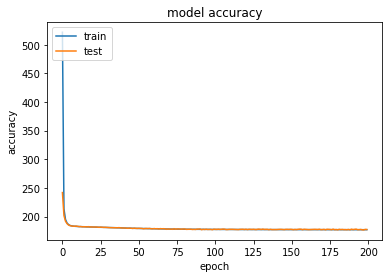

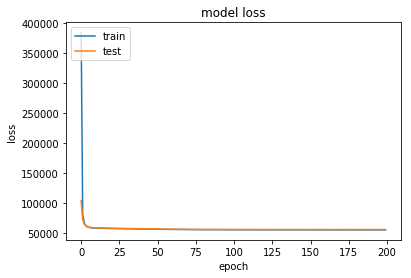

In [23]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()